In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### df.plot()

- Pandas 데이터타입의 plot 메서드는 matplotlib를 내부에서 임포트하여 사용
- plot 메서드 차트 종류 : kind 파라미터 값으로 전달
    - line(기본)
    - bar
    - pie
    - hist
    - box
    - scatter

In [2]:
# 주가 데이터와 유사한 흐름을 보이는 샘플 생성
# value : 표준정규분포에서 100 x 3 구조의 표본 추출
# 컬럼 3개 : A, B, C
# index : pd.date_range(start, [end], periods=n)
np.random.seed(111)
data = np.random.randn(100, 3)
data

array([[-1.13383833,  0.38431919,  1.49655378],
       [-0.3553823 , -0.78753354, -0.45943891],
       [-0.05916877, -0.3541735 , -0.73552305],
       [-1.18393989,  0.23889413, -0.58992026],
       [-1.44058512,  0.77370311, -1.02796733],
       [-0.09098625,  0.492003  ,  0.4246722 ],
       [ 1.28304882,  0.31598645, -0.4080822 ],
       [-0.06794759, -0.95242666, -0.1106774 ],
       [ 0.57059429,  0.91542017, -1.66934051],
       [ 0.48271364, -0.31047267,  2.39468973],
       [ 1.55093092, -0.64646518, -0.92893724],
       [-1.65497614,  0.3501925 , -0.14175652],
       [ 0.52108179, -0.02090086, -1.74384395],
       [-0.79915888, -1.30357043,  0.178105  ],
       [-0.33440236, -0.30602713, -0.33240557],
       [ 1.96294734,  0.71924249,  1.14288651],
       [ 2.08287697, -1.28464775,  0.53812761],
       [-0.04453941,  2.59716437, -0.05826628],
       [-0.945287  ,  0.54117239, -0.05500889],
       [ 1.12002081, -0.19164295, -0.61013842],
       [-0.44457885, -2.2040093 , -0.430

In [3]:
df = pd.DataFrame(data, 
                 #2019-01-01부터 100일간의 날짜생성
                  index=pd.date_range('1/1/2019', periods=100),
                 columns=['A', 'B', 'C']).cumsum()
df

,A,B,C
2019-01-01,-1.133838,0.384319,1.496554
2019-01-02,-1.489221,-0.403214,1.037115
2019-01-03,-1.548389,-0.757388,0.301592
2019-01-04,-2.732329,-0.518494,-0.288328
2019-01-05,-4.172914,0.255209,-1.316296
...,...,...,...
2019-04-06,-1.581068,-9.757020,0.196845
2019-04-07,-2.905018,-8.678047,1.681313
2019-04-08,-2.961347,-8.189804,1.538590
2019-04-09,-3.572676,-8.565796,0.971932


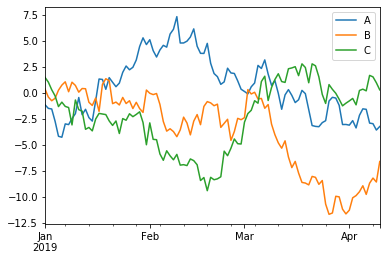

In [4]:
# 라인플롯(디폴트)
df.plot()

In [5]:
# 라이브러리에서 제공하는 기본 데이터 가져오기
import seaborn as sns

In [6]:
# 붓꽃 데이터 저장
iris = sns.load_dataset('iris')

In [7]:
iris.shape

(150, 5)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# plot에서 한글 폰트 지정
font_name=matplotlib.font_manager.FontProperties(
    fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

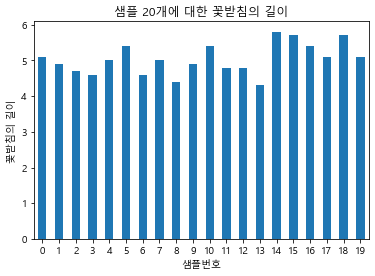

In [11]:
# sepal_length(꽃받침 길이)의 20개 샘플에 대하여 bar graph로 시각화
# Series.plot()
iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title('샘플 20개에 대한 꽃받침의 길이')
plt.xlabel('샘플번호')
plt.ylabel('꽃받침의 길이')
plt.show()

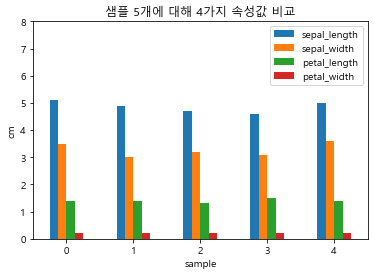

In [12]:
iris[:5].plot(kind='bar', rot=0) #plot.bar()
plt.title('샘플 5개에 대해 4가지 속성값 비교')
plt.xlabel('sample')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.show()

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# 각 종별로 4개 속성값의 평균 => 각 속성이 종별로 어떤 차이가 있는지 보기 위해
iris.pivot_table(index='species', values=['sepal_length','sepal_width','petal_length',
                                         'petal_width'],
                aggfunc='mean')

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [18]:
# .groupby를 사용하는 케이스
df2 = iris.groupby(iris.species).mean()

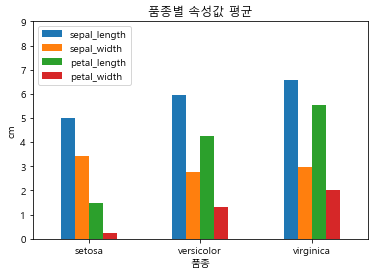

In [19]:
# bar graph로 시각화
# 인덱스별로 컬럼값을 막대그래프로 시각화
df2.plot(kind='bar', rot=0)
plt.title('품종별 속성값 평균')
plt.xlabel('품종')
plt.ylabel('cm')
plt.ylim(0, 9)
plt.show()

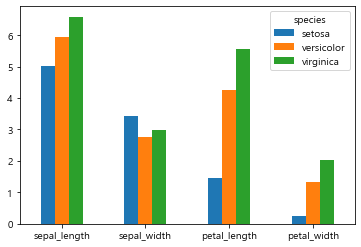

In [21]:
# x, y축 전치
df2.T.plot(kind='bar', rot=0)
plt.show()

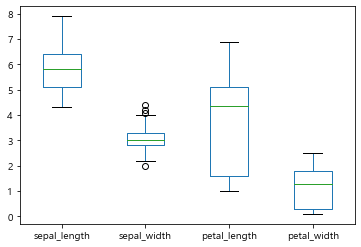

In [22]:
# 각 속성별로 데이터 값에 대한 기술통계값 및 이상치 확인 => box-plot
# df.plot(kind='box') => 컬럼을 기준으로 기술통계, 이상치 확인
iris.plot(kind='box')
plt.show()

In [23]:
# 붓꽃 종 확인
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

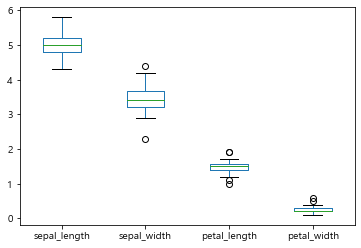

In [24]:
# 종 별로 box-plot(힌트 : 조건색인)
# setosa
iris[iris.species == 'setosa'].plot(kind='box')

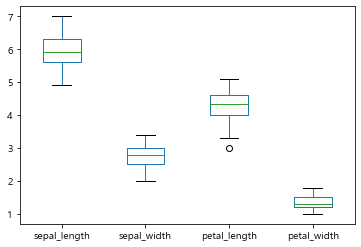

In [25]:
# versicolor
iris[iris['species'] == 'versicolor'].plot(kind='box')

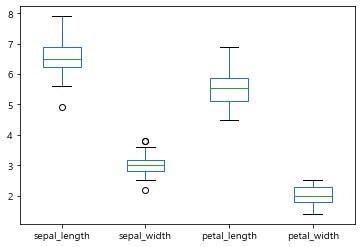

In [27]:
# virginica
iris[iris['species']=='virginica'].plot(kind='box')

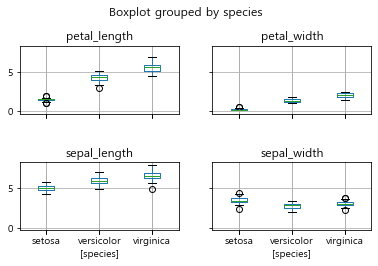

In [31]:
# 품종별로 속성별 boxplot 생성 => 하나의 plot 내부에 여러 boxplot 띄우기
# iris.plot(kind='box') # box plot => 컬럼(수치데이터)
iris.boxplot(by='species')
plt.tight_layout(pad=3)
plt.show()